<a href="https://colab.research.google.com/github/0xVolt/cemetery-of-culture/blob/main/year-3/image-processing/programming-assignment-2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Image Processing Programming Assignment 2

### _Question_

Take an image of yourself and apply various edge detection algorithms. Experiment with adding noise to the image artificially with various kinds of noises. Analyse the histogram of the noisy and regular images before and after applying the edge detection algorithms. Apply image segmentation with thresholding, OATS and other segmentation techniques. As a bonus, use HOD, SIFT and SURF algorithms to extract the features from the image.

---


# 0. Import dependencies


Importing libraries for image manipulation and plotting.


In [44]:
import cv2
import os
import matplotlib.pyplot as plt
import skimage
from skimage.color import rgb2gray


Listing out all the image dependencies present in the `./assets` folder.


In [45]:
print(os.listdir('./assets'))


['indoors.jpg']


Importing image and displaying it.


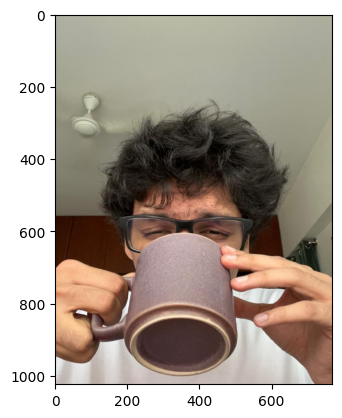

In [46]:
img = plt.imread('./assets/indoors.jpg')
plt.imshow(img)


---


# 1. Creating images' histogram


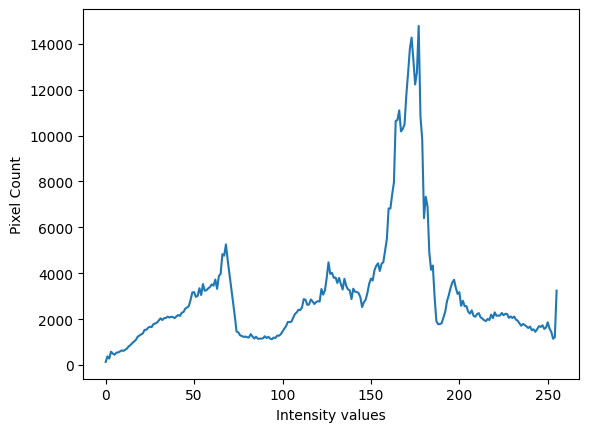

In [47]:
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.xlabel('Intensity values')
plt.ylabel('Pixel Count')
plt.plot(histogram)

plt.show()


# 2. Adding noise to the image


In [48]:
gaussian_image = skimage.util.random_noise(
    img, mode='gaussian', seed=None, clip=True, mean=0.25)
speckle_image = skimage.util.random_noise(
    img, mode='speckle', seed=None, clip=True, mean=0.7)
poisson_image = skimage.util.random_noise(
    img, mode='poisson', seed=None, clip=True)
salt_and_pepper_image = skimage.util.random_noise(
    img, mode='s&p', seed=None, clip=True, amount=0.75)


In [49]:
dict_of_images = {
    'Original': img,
    'Gaussian Noise': gaussian_image,
    'Speckle Noise': speckle_image,
    'Poisson Noise': poisson_image,
    'Salt and Pepper Noise': salt_and_pepper_image
}


In [50]:
dict_of_images


{'Original': array([[[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [174, 175, 157],
         [174, 175, 157],
         [174, 175, 157]],
 
        [[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [174, 175, 157],
         [174, 175, 157],
         [174, 175, 157]],
 
        [[175, 176, 160],
         [175, 176, 160],
         [175, 176, 160],
         ...,
         [173, 174, 156],
         [174, 175, 157],
         [174, 175, 157]],
 
        ...,
 
        [[213, 209, 208],
         [210, 206, 205],
         [207, 203, 202],
         ...,
         [146, 105,  85],
         [147, 106,  86],
         [147, 106,  86]],
 
        [[211, 207, 206],
         [208, 204, 203],
         [205, 201, 200],
         ...,
         [148, 107,  87],
         [148, 107,  87],
         [149, 108,  88]],
 
        [[210, 206, 205],
         [207, 203, 202],
         [204, 200, 199],
         ...,
         [149, 1

In [51]:
for elt in dict_of_images:
    print(elt)


Original
Gaussian Noise
Speckle Noise
Poisson Noise
Salt and Pepper Noise


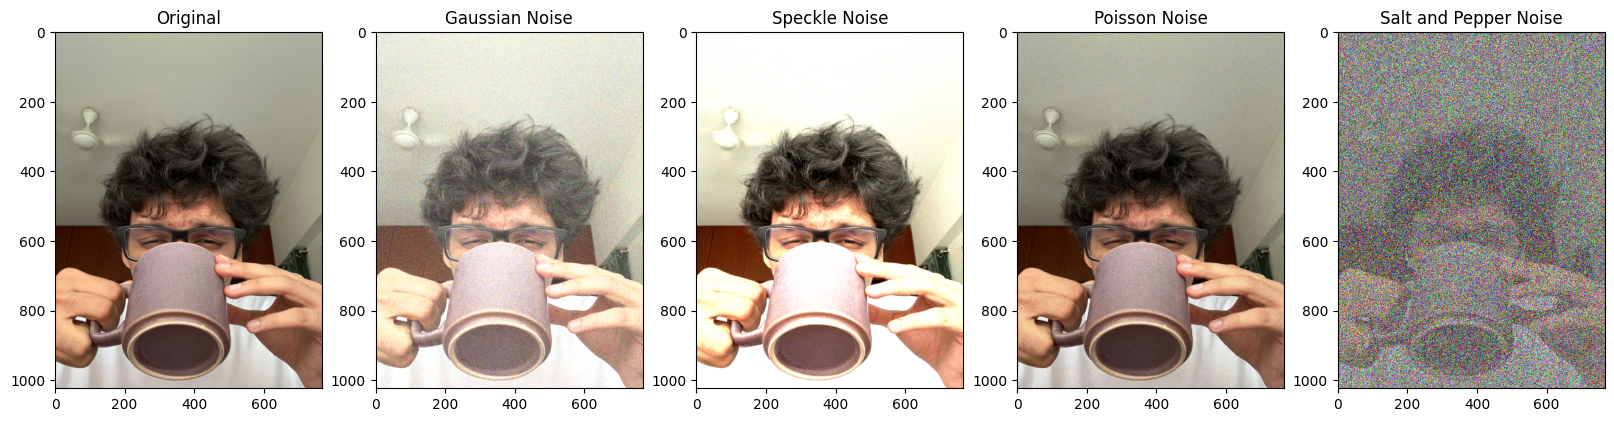

In [52]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in dict_of_images:
    ax[i].imshow(dict_of_images[elt])
    ax[i].set_title(elt)

    i += 1


---


# 3. Edge Detection


## 3.1 Sobel Edge Detection for images with different kinds of noise


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


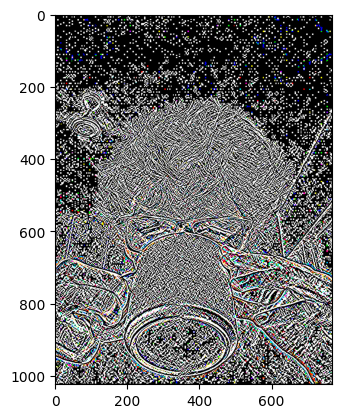

In [53]:
sobel = cv2.Sobel(img, cv2.CV_64F, 1, 1, ksize=5)
plt.imshow(sobel)


In [54]:
sobel = dict()

for elt in dict_of_images:
    sobel[elt] = cv2.Sobel(dict_of_images[elt], cv2.CV_64F, 1, 0, ksize=5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


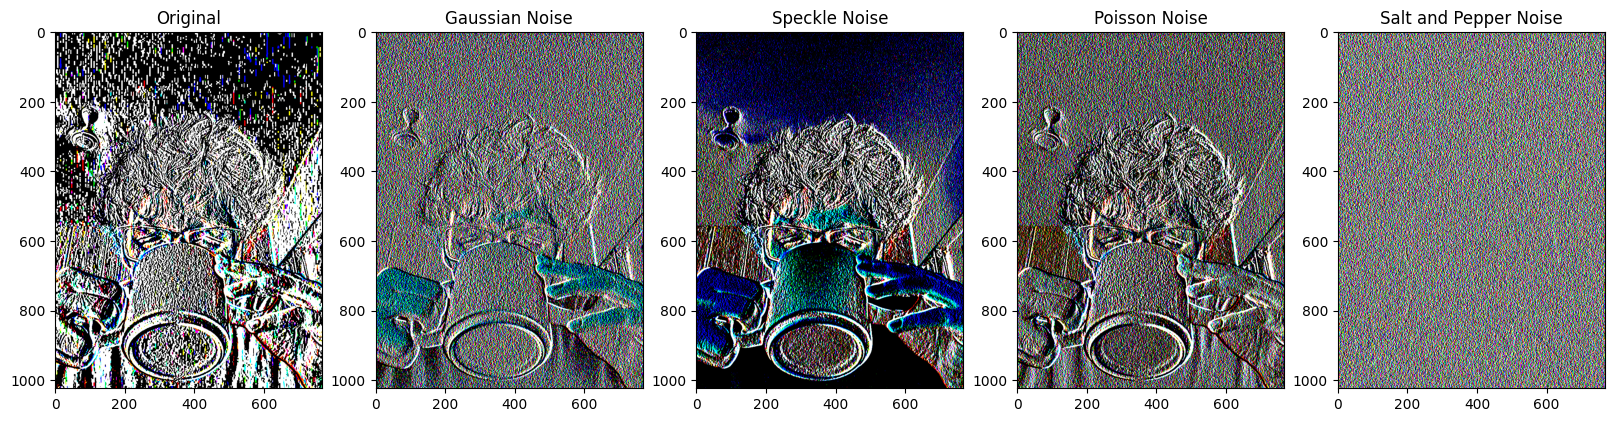

In [55]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in sobel:
    ax[i].imshow(sobel[elt])
    ax[i].set_title(elt)

    i += 1


## 3.2 Laplace Edge Detection for images with different kinds of noise


In [56]:
laplace = dict()

for elt in dict_of_images:
    laplace[elt] = cv2.Laplacian(dict_of_images[elt], cv2.CV_64F)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


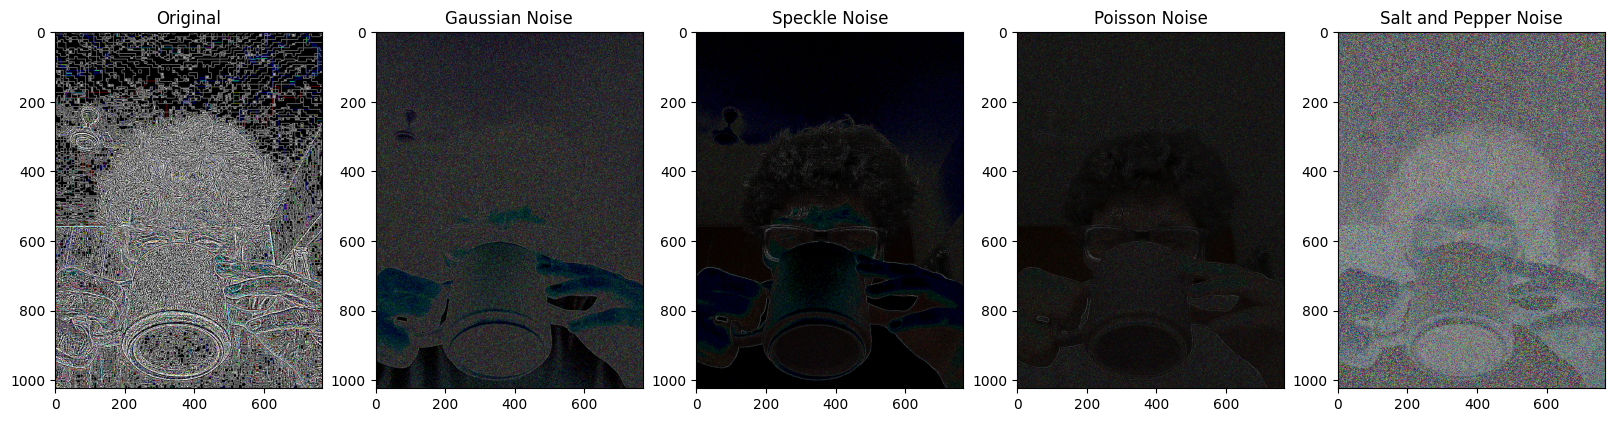

In [57]:
fig, ax = plt.subplots(1, 5, figsize=(20, 10))

i = 0
for elt in laplace:
    ax[i].imshow(laplace[elt])
    ax[i].set_title(elt)

    i += 1


## 3.3 Canny Edge Detection for the original image


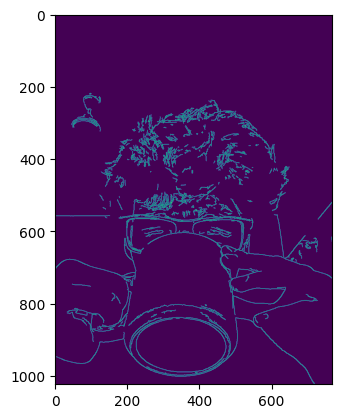

In [58]:
canny = cv2.Canny(img, 100, 200)
plt.imshow(canny)


---


# 4. Thresholding


## 4.1 Global Thresholding


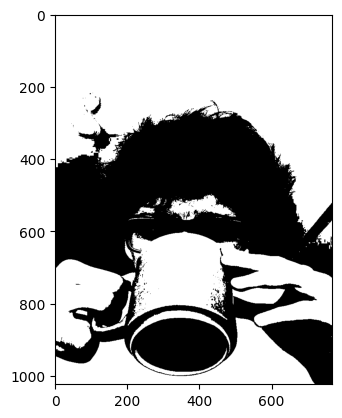

In [59]:
gray = rgb2gray(img)

mean = gray.mean()

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if gray[i][j] > mean:
            gray[i][j] = 1
        else:
            gray[i][j] = 0

plt.imshow(gray, cmap='gray')


## 4.2 Local Thresholding


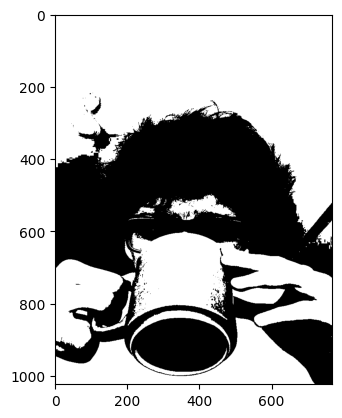

In [60]:
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if gray[i][j] > mean:
            gray[i][j] = 3
        elif gray[i][j] > 0.5:
            gray[i][j] = 2
        elif gray[i][j] > 0.25:
            gray[i][j] = 1
        else:
            gray[i][j] = 0

plt.imshow(gray, cmap='gray')


## 4.3 Comparing Thresholding methods


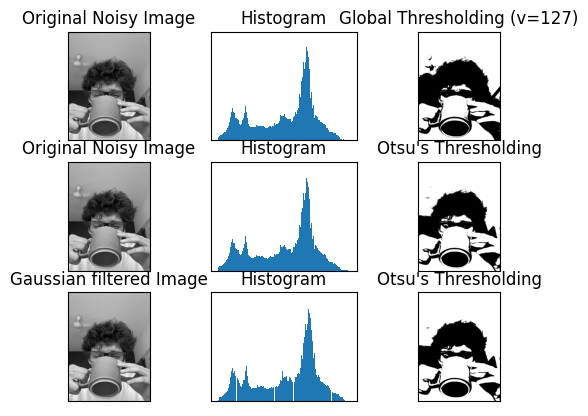

In [61]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./assets/indoors.jpg', 0)

# global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


---
